<a href="https://colab.research.google.com/github/luthfijuliandri/Intelligence-System/blob/main/Tugas_2_IS_RK_Muhammad_Luthfi_Juliandri_4521210078.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas 2 Intelligence System**
## Nama : Muhammad Luthfi Juliandri
## NPM  : 4521210078

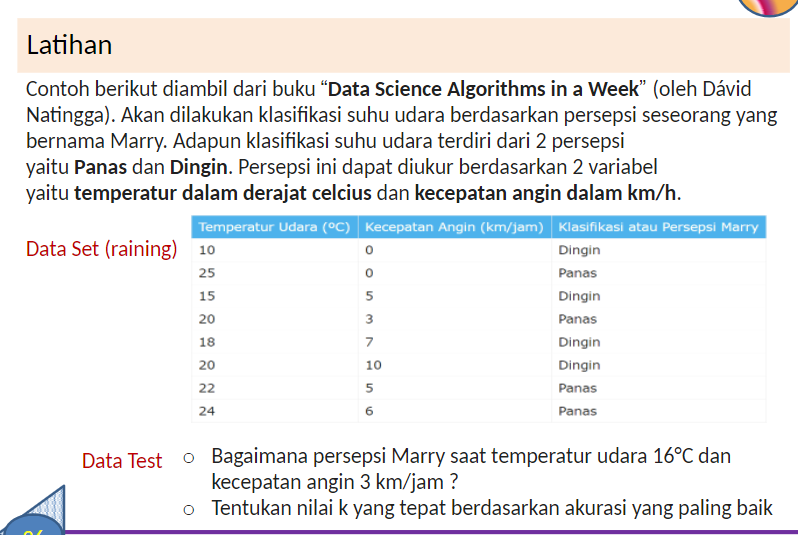

Import library pandas dan mlxtend untuk penggunaan apriori dan aturan asosiasi

In [249]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

Definisikan dataset menggunakan array berdasarkan soal yang diberikan

In [250]:
dataset = {
    'Temperatur Udara (°C)': [10, 25, 15, 20, 18, 20, 22, 24],
    'Kecepatan Angin (km/jam)': [0, 0, 5, 3, 7, 10, 5, 6],
    'Klasifikasi atau Persepsi Marry': ['Dingin', 'Panas', 'Dingin', 'Panas', 'Dingin', 'Dingin', 'Panas', 'Panas']
}

In [251]:
dataset

{'Temperatur Udara (°C)': [10, 25, 15, 20, 18, 20, 22, 24],
 'Kecepatan Angin (km/jam)': [0, 0, 5, 3, 7, 10, 5, 6],
 'Klasifikasi atau Persepsi Marry': ['Dingin',
  'Panas',
  'Dingin',
  'Panas',
  'Dingin',
  'Dingin',
  'Panas',
  'Panas']}

convert ke dataframe

In [252]:
df = pd.DataFrame(dataset)

In [253]:
df

,Temperatur Udara (°C),Kecepatan Angin (km/jam),Klasifikasi atau Persepsi Marry
0,10,0,Dingin
1,25,0,Panas
2,15,5,Dingin
3,20,3,Panas
4,18,7,Dingin
5,20,10,Dingin
6,22,5,Panas
7,24,6,Panas


Memakai TransactionEncoder agar array dataset di convert ke dataframe

# **Implementasi KNN**

Melabeli class dunaba dingin = 0 dan panas = 1

In [254]:
label_encoder = LabelEncoder()
df['Klasifikasi atau Persepsi Marry'] = label_encoder.fit_transform(df['Klasifikasi atau Persepsi Marry'])

define X sebagai feature dan y sebagai class atau target

In [255]:
X = df[['Temperatur Udara (°C)', 'Kecepatan Angin (km/jam)']]
y = df['Klasifikasi atau Persepsi Marry']

In [256]:
X

,Temperatur Udara (°C),Kecepatan Angin (km/jam)
0,10,0
1,25,0
2,15,5
3,20,3
4,18,7
5,20,10
6,22,5
7,24,6


In [257]:
y

,Klasifikasi atau Persepsi Marry
0,0
1,1
2,0
3,1
4,0
5,0
6,1
7,1


Split data menjadi train dan test dengan rasio 1:0.2, serta tetapkan random_state agar nilai split tidak berubah

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [259]:
X_train

,Temperatur Udara (°C),Kecepatan Angin (km/jam)
0,10,0
7,24,6
2,15,5
4,18,7
3,20,3
6,22,5


In [260]:
y_train

,Klasifikasi atau Persepsi Marry
0,0
7,1
2,0
4,0
3,1
6,1


Baris ini mendeklarasikan sebuah list kosong yang disebut accuracies

In [261]:
accuracies = []
k_values = range(1, 6)


Fungsi Loop ini mengiterasi setiap nilai k dalam k_values, di mana untuk setiap
k, model KNeighborsClassifier dilatih dengan data pelatihan (X_train dan y_train). Setelah dilatih, model digunakan untuk memprediksi data pengujian (X_test), dan akurasi prediksi dihitung dengan membandingkan hasil prediksi (y_pred) dengan label sebenarnya (y_test). Nilai akurasi ini kemudian ditambahkan ke list accuracies.

In [262]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

In [263]:
accuracy_df = pd.DataFrame({
    'Nilai k': k_values,
    'Akurasi': accuracies
})

# Menampilkan tabel akurasi
print("Tabel Akurasi KNN:")
print(accuracy_df)

Tabel Akurasi KNN:
   Nilai k  Akurasi
0        1      1.0
1        2      1.0
2        3      0.5
3        4      0.5
4        5      0.5


menentukan nilai k optimal dengan mencari indeks dari akurasi tertinggi dalam accuracies, lalu mengambil nilai k yang sesuai dari k_values, dan mencetak hasilnya.

In [264]:
optimal_k = k_values[np.argmax(accuracies)]
print(f'\nNilai k optimal adalah: {optimal_k}')



Nilai k optimal adalah: 1


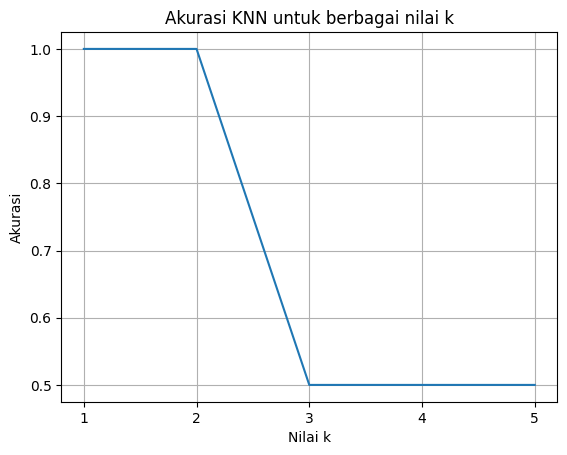

In [265]:
plt.plot(k_values, accuracies)
plt.xlabel('Nilai k')
plt.ylabel('Akurasi')
plt.title('Akurasi KNN untuk berbagai nilai k')
plt.xticks(k_values)
plt.grid()
plt.show()

Testing data dengan soal yang diberikan

In [266]:
new_data = np.array([[16, 3]])
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
prediction = knn.predict(new_data)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [267]:
print(prediction)

[0]


In [268]:
print(f'Persepsi Marry saat temperatur udara 16°C dan kecepatan angin 3 km/jam adalah: {predicted_class[0]}')

Persepsi Marry saat temperatur udara 16°C dan kecepatan angin 3 km/jam adalah: Dingin
